<a href="https://colab.research.google.com/github/JosenildoJunior/StatPyDataScience/blob/main/Distribui%C3%A7%C3%A3o_de_frequ%C3%AAncia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estatística com Python: Um Guia para Estudos e Solução de Problemas


A distribuição de frequência é uma representação estatística que organiza os dados em categorias e mostra a frequência (quantidade de vezes) com que cada categoria ocorre em um conjunto de dados. Essa representação fornece uma visão geral da distribuição e padrões dos dados, facilitando a compreensão da sua dispersão e centralidade.


## **Carregando os dados**

Para seguirmos será necessario executar importação de algumas bibliotecas

In [1]:
# Manipulação de arquivos
import pandas as pd

# Algébra linear
import numpy as np

# Visualização de dados
import matplotlib.pyplot as plt

# Visualização de dados
import seaborn as sns

# Funções matemáticas
import math

Criando dados ficticios para execução das técnicas de distribuição de frequencia

In [2]:
# Criando uma tabela primitiva
dados = np.array([160, 165, 167, 164, 160, 166, 160, 161, 150, 152, 173, 160, 155,
                  164, 168, 162, 161, 168, 163, 156, 155, 169, 151, 170, 164,
                  155, 152, 163, 160, 155, 157, 156, 158, 158, 161, 154, 161, 156, 172, 153])

## **Ordenando os dados**

Rol: Uma lista de todos os valores distintos observados em um conjunto de dados, organizados em ordem crescente.

In [3]:
# Utilizando o 'sort' para ordenar os dados
dados = np.sort(dados)

In [4]:
# Observando os dados
dados

array([150, 151, 152, 152, 153, 154, 155, 155, 155, 155, 156, 156, 156,
       157, 158, 158, 160, 160, 160, 160, 160, 161, 161, 161, 161, 162,
       163, 163, 164, 164, 164, 165, 166, 167, 168, 168, 169, 170, 172,
       173])

Obtendo o valor minimo e maximo para utilizar os valores futuramente

In [18]:
# Pegando o menor valor
minimo = dados.min()

# Pegando o maior valor
maximo = dados.max()

print(f"O menor valor é: {minimo} e o maior valor é: {maximo}")

O menor valor é: 150 e o maior valor é: 173


## **Frequência**

*Frequência:* O número de observações ou ocorrências em cada classe. A fórmula para calcular a frequência é $(f = \text{Número de Observações na Classe})$.

In [5]:
# Exibindo com que frequência as classes se repetem
np.unique(dados, return_counts= True)

(array([150, 151, 152, 153, 154, 155, 156, 157, 158, 160, 161, 162, 163,
        164, 165, 166, 167, 168, 169, 170, 172, 173]),
 array([1, 1, 2, 1, 1, 4, 3, 1, 2, 5, 4, 1, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1]))

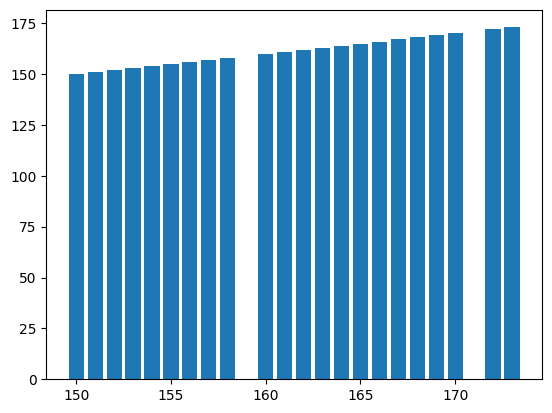

In [6]:
# Observando graficamente
plt.bar(dados, dados);

## **Número de classes**

A Regra de Sturges é uma abordagem comum para determinar o número ideal de classes em uma distribuição de frequência para a construção de histogramas. Essa regra é baseada no tamanho da amostra e busca equilibrar a representatividade da distribuição sem gerar um excesso de classes.

- Fórmula: $ k = 1 + 3.322 \cdot \log_{10}(n) $ (onde k é o número recomendado de classes e n é o tamanho da amostra.)


In [32]:
# Obtendo o tamanho da amostra
n = len(dados)

Ao aplicar a fórmula é necessario arredondar o valor, por isso é necessario aplicar a função 'round' na fórmula.

In [34]:
# Aplicando a fórmula
k = (1 + 3.3 * np.log10(n)).round()

print(f"O número de classes é {k}")

O número de classes é 6.0


## **Amplitude amostral (AA)**

**Amplitude Amostral:**
A amplitude amostral $(AA)$ é uma medida que representa a extensão total dos dados em um conjunto, calculada subtraindo o menor valor observado $(X_{\text{mínimo}}$) do maior valor observado $(X_{\text{máximo}}$).


Amplitude Amostral $(A) = X_{\text{máximo}} - X_{\text{mínimo}}$


In [9]:
# Calculando a amplitude do intervalo
amplitude_amostral = max(dados) - min(dados)


# Exibindo o resultado
print(f"Amplitude do amostral: {amplitude_amostral}")

Amplitude do amostral: 23


## **Amplitude do intervalo de classe**

A amplitude do intervalo de classe é uma medida estatística que representa a largura de cada intervalo em uma distribuição de frequência.

In [10]:
# Calculando a amplitude do intervalo de classe
h = amplitude_amostral / k

# Arrendondando o valor para cima
h = math.ceil(h)

# Exibindo a amplitude do intervalo de classe
print(f"A amplitude do intervalo de classe é: {h}")

A amplitude do intervalo de classe é: 4


Agora que já temos a amplitude amostral, amplitude do intervalo e o número de classes podemos seguir com a construção da distribuição frequencia

## **Construção da distribuição**

Para a construção da distribuição propriamente dita podemos utilizar de uma construção um pouco mais manual por assim dizer, utilizando listas e loops ou podemos simpolesmente utilizar bibliotecas que podem nos auxiliar nessa parte, iremos observar as duas maneiras

### *Construção manual*

Primeiro vamos criar um intervalo, para isso foi utilizado a função do numpy chamada arrange, passamos como argumento o menor valor que nesse caso seria 150 e o maior valor que nesse caso é o numero 173 porém por conta do nosso 'step' essa função iria pegar o ultimo valor - 1 por isso utilizamos o + 2, dessa forma a função vai pegar todos os valores e o 'h' é referente ao intervalo de uma classe para outra.

In [25]:
# Criando os intervalos
intervalos = np.arange(minimo, maximo + 2, step = h)

# Observando os valores
intervalos

array([150, 154, 158, 162, 166, 170])

Criando uma if dentro de um loop para realizar a contagem de cada uma das frequencia nas suas determinadas classes

In [13]:
intervalo1, intervalo2, intervalo3, intervalo4, intervalo5, intervalo6 = 0,0,0,0,0,0
for i in range(n):
  if dados[i] >= intervalos[0] and dados[i] < intervalos[1]:
    intervalo1 += 1
  elif dados[i] >= intervalos[1] and dados[i] < intervalos[2]:
    intervalo2 += 1
  elif dados[i] >= intervalos[2] and dados[i] < intervalos[3]:
    intervalo3 += 1
  elif dados[i] >= intervalos[3] and dados[i] < intervalos[4]:
    intervalo4 += 1
  elif dados[i] >= intervalos[4] and dados[i] < intervalos[5]:
    intervalo5 += 1
  elif dados[i] >= intervalos[5] and dados[i] < intervalos[6]:
    intervalo6 += 1

Incrementando todos os valores da contagem da frequencia em uma lista

In [14]:
# Criando a lista
lista_intervalos = []
lista_intervalos.append(intervalo1)
lista_intervalos.append(intervalo2)
lista_intervalos.append(intervalo3)
lista_intervalos.append(intervalo4)
lista_intervalos.append(intervalo5)
lista_intervalos.append(intervalo6)
lista_intervalos

[5, 9, 11, 7, 5, 3]

Criando uma e percorrendo os valores presentes na 'lista intervalos' e concatenando com os valores dos intervalos criados logo acima

In [15]:
# Criando a lista
lista_classes = []

# Criando um laço de repetição
for i in range(len(lista_intervalos)):
  lista_classes.append(str(intervalos[i]) + '-' + str(intervalos[i + 1]))

In [16]:
# Observando a lista
lista_classes

['150-154', '154-158', '158-162', '162-166', '166-170', '170-174']

Gerando a visualização da distribuição de frequencia criado manualmente

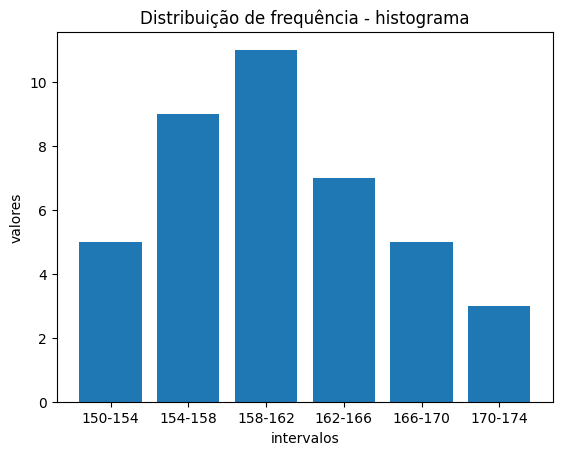

In [17]:
plt.bar(lista_classes, lista_intervalos)
plt.title('Distribuição de frequência - histograma')
plt.xlabel('intervalos')
plt.ylabel('valores');

Observar uma distribuição dessa forma é bem mais agradavel, no entanto a construção ficou um pouco trabalhosa por assim dizer, dito isso vamos para uma criação utilizando as bibliotecas disponiveis

### *Histograma com numpy e matplotlib*

Recriando os mesmos dados utilizados acima

In [28]:
# Criando uma tabela primitiva
dados = np.array([160, 165, 167, 164, 160, 166, 160, 161, 150, 152, 173, 160, 155,
                  164, 168, 162, 161, 168, 163, 156, 155, 169, 151, 170, 164,
                  155, 152, 163, 160, 155, 157, 156, 158, 158, 161, 154, 161, 156, 172, 153])

Agira criamos 2 variaveis, chamada frequencia e classes onde nelas está sendo armazenada a funçãol histograma do numpy, que recebe como parametros os dados e o parametro 'bins' é referente ao intervalo de classes, nele foi passado como parametro o 'sturges' que foi a técnica utilizada acima para calcular a amplitude do intervalo de classe

In [31]:
# Criando a distribuição de frequência
frequencia, classes = np.histogram(dados, bins = 'sturges')


# Observando os valores das classes e da distribuição
frequencia, classes

(array([ 5,  8,  3, 12,  5,  4,  3]),
 array([150.        , 153.28571429, 156.57142857, 159.85714286,
        163.14285714, 166.42857143, 169.71428571, 173.        ]))

Podemos observar uma pequena diferença nos intervalos de classes, muito provavelmente porque ao calcularmos o numero de classes nos arredondamos o valor para baixo por isso obtivemos o valor 6, caso não tivessemos arredondado o valor teria dado aproximadamente 6,28

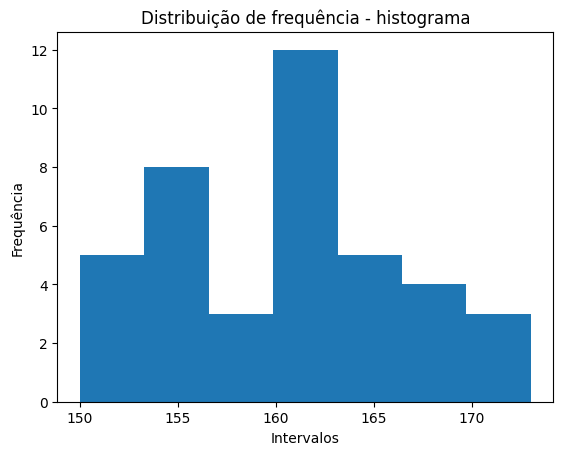

In [36]:
# Gerando a visualização
plt.hist(dados, classes)
plt.title('Distribuição de frequência - histograma')
plt.xlabel('Intervalos')
plt.ylabel('Frequência');

Podemos observar uma semelhança na visualização, conseguimos atingir um resultado bem semelhante utilizando bem menos linha de codigo o que pode tornar essa solução bem mais viavel

### *Distribuição de frequência com pandas e seaborn*

Esse método será utilizado para a criação de distribuição em dados no formato de um DataFrame por exemplo

In [38]:
# Observando o tipo do dado
type(dados)

numpy.ndarray

Observamos dessa forma que até agora estavamos trabalhando com dados no formato numpy

In [40]:
# Convertendo os dados para um Data Frame
df = pd.DataFrame({'dados': dados})

# Observando os valores
df.head()

,dados
0,160
1,165
2,167
3,164
4,160


Criando a distribuição

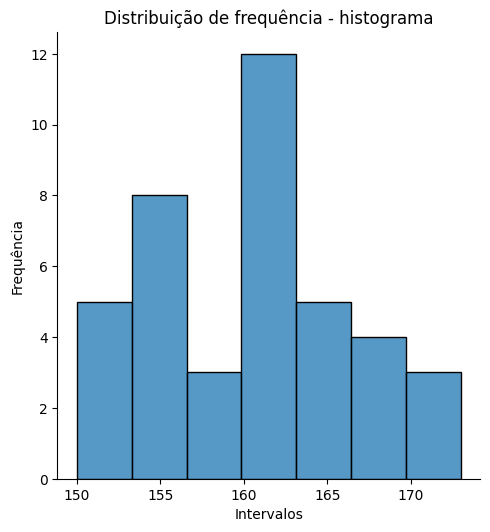

In [53]:
# Exibindo a distribuição
sns.displot(data = dados)
plt.title('Distribuição de frequência - histograma')
plt.xlabel('Intervalos')
plt.ylabel('Frequência');

Podemos observar agora um gráfico bem semelhante aos exemplos anteriores porém utilizando um formato diferente nos dados.